In [302]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, LeaveOneOut, RepeatedKFold
from sklearn.metrics import mean_squared_error, roc_curve, auc, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

In [353]:
salary = pd.read_csv('eda_data.csv.zip')
salary.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


# Cleaning

In [354]:
salary_df = salary.drop(columns = ['Unnamed: 0' , 'seniority', 'Job Description', 'Headquarters', 'job_simp', 'Industry', 'Sector', 'Revenue',
                               'Competitors', 'company_txt', 'hourly', 'employer_provided', 'Salary Estimate', 'Founded', 'min_salary', 'max_salary', 'Company Name', 'Size',
                                  'Location'])
salary_df

,Job Title,Rating,Type of ownership,avg_salary,job_state,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
0,Data Scientist,3.8,Company - Private,72.0,NM,0,47,1,0,0,0,1,2536,0
1,Healthcare Data Scientist,3.4,Other Organization,87.5,MD,0,36,1,0,0,0,0,4783,0
2,Data Scientist,4.8,Company - Private,85.0,FL,1,10,1,0,1,0,1,3461,0
3,Data Scientist,3.8,Government,76.5,WA,1,55,1,0,0,0,0,3883,3
4,Data Scientist,2.9,Company - Private,114.5,NY,1,22,1,0,0,0,1,2728,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",3.9,Company - Public,84.5,MA,0,190,0,0,0,1,0,6162,3
738,Senior Data Engineer,4.4,Company - Public,102.5,TN,0,14,1,0,1,1,0,6130,3
739,"Project Scientist - Auton Lab, Robotics Institute",2.6,College / University,73.5,PA,1,36,0,0,0,0,1,3078,0
740,Data Science Manager,3.2,Company - Private,127.5,PA,0,-1,0,0,0,0,1,1642,0


Text(0, 0.5, 'Avg Salary')

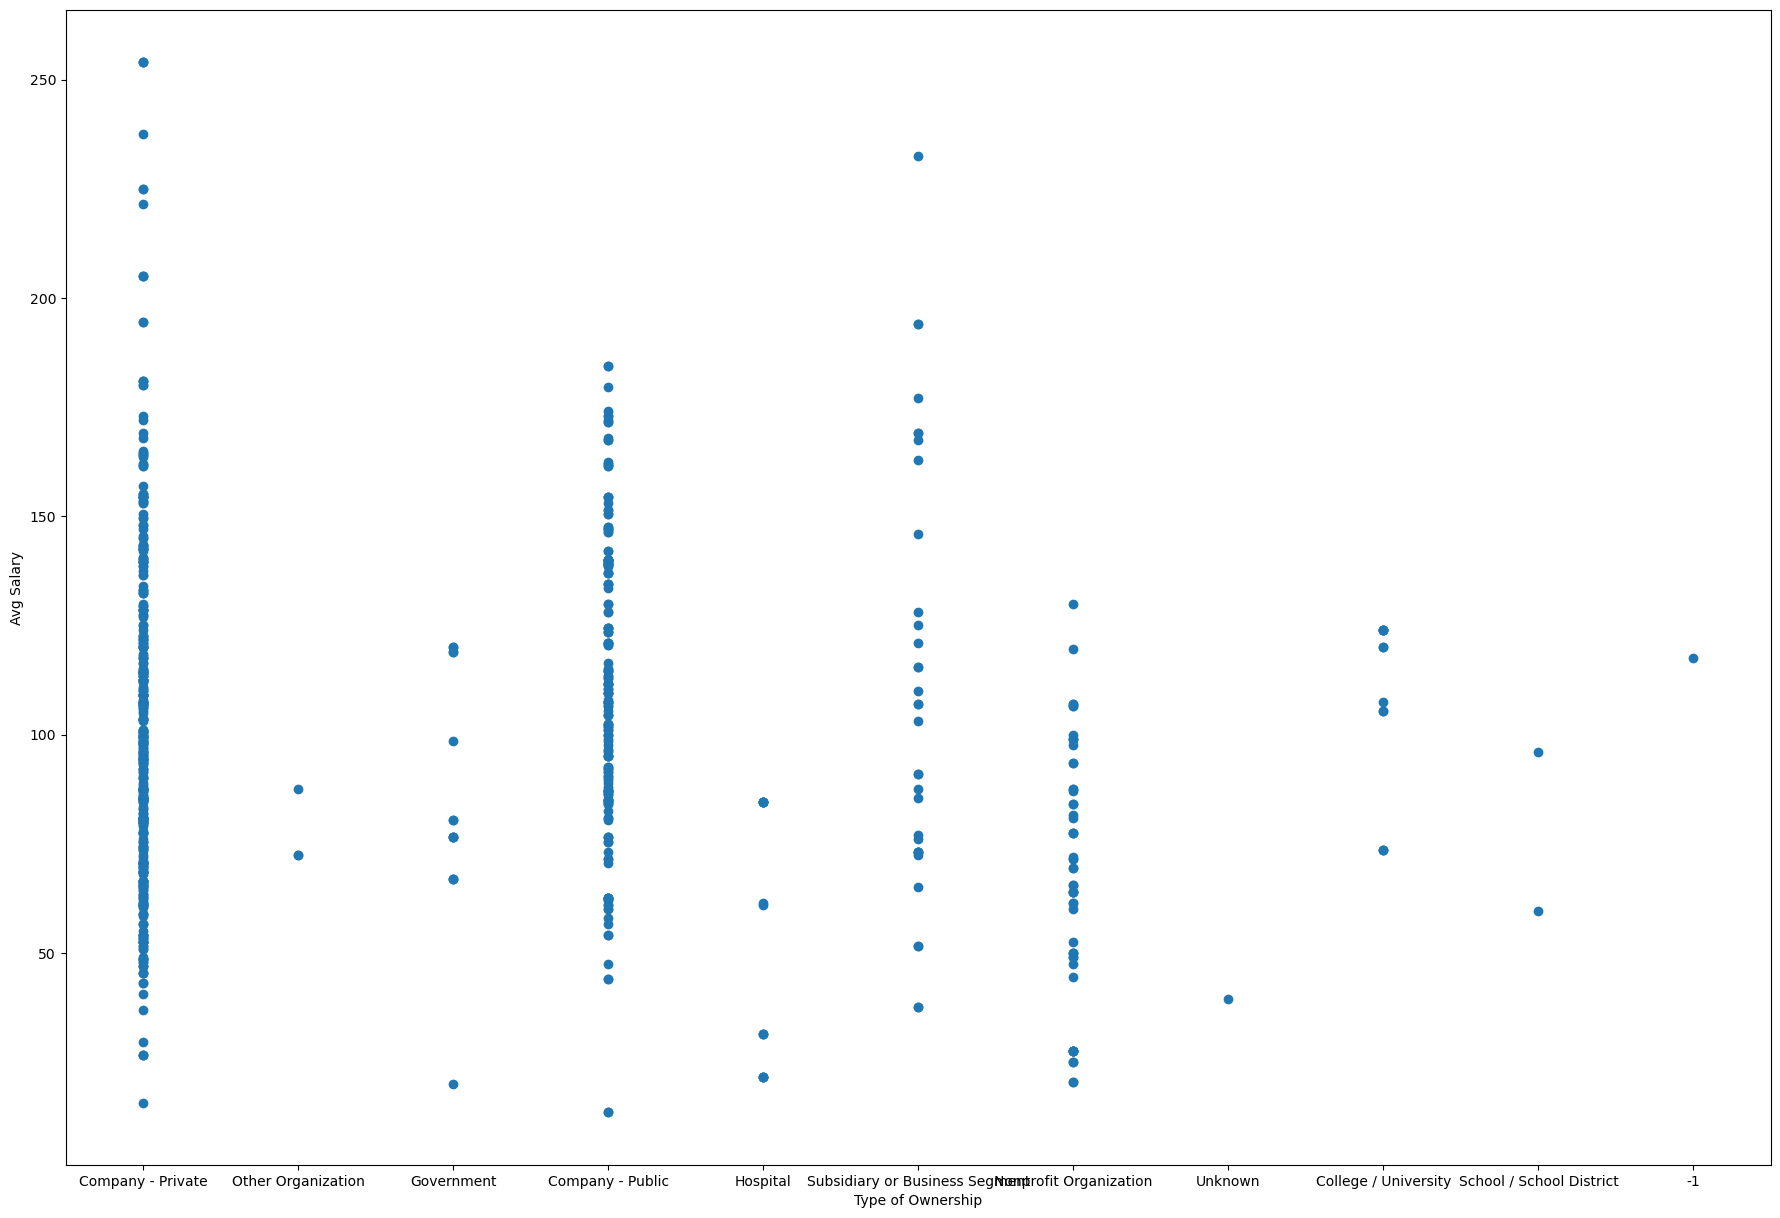

In [335]:
plt.figure(figsize= (22,15))
plt.scatter(salary_df['Type of ownership'], salary_df['avg_salary'])
plt.xlabel('Type of Ownership')
plt.ylabel('Avg Salary')

Text(0, 0.5, 'Avg Salary')

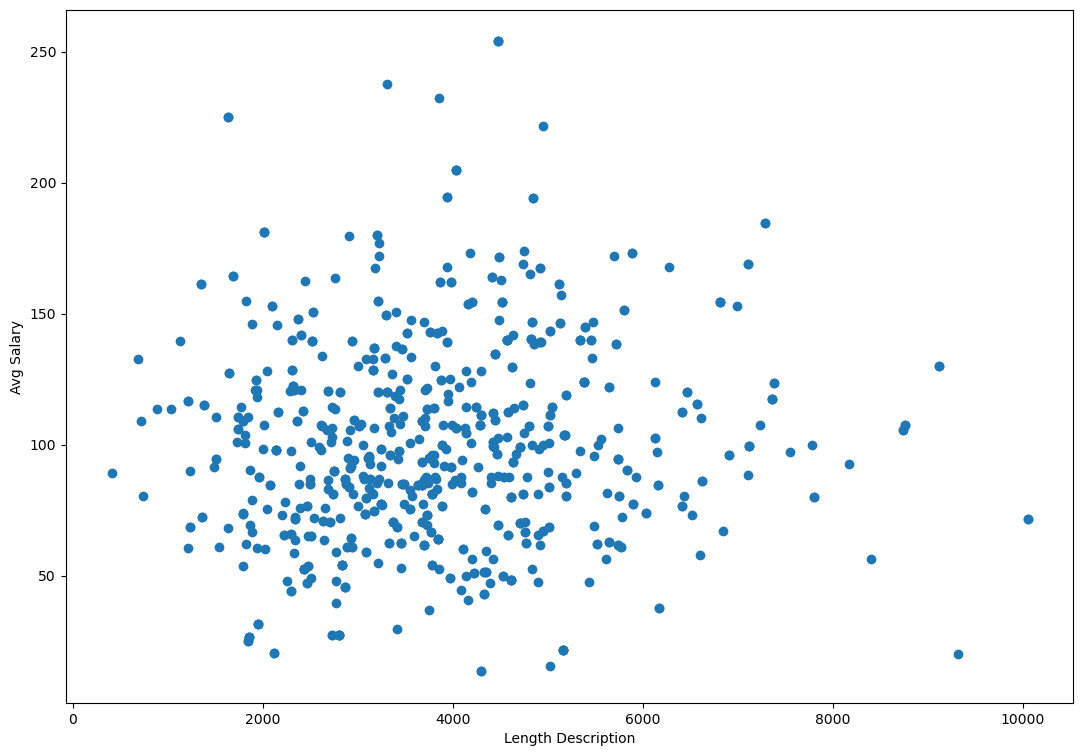

In [462]:
plt.figure(figsize= (13,9))
plt.scatter(salary_df['desc_len'], salary_df['avg_salary'])
plt.xlabel('Length Description')
plt.ylabel('Avg Salary')

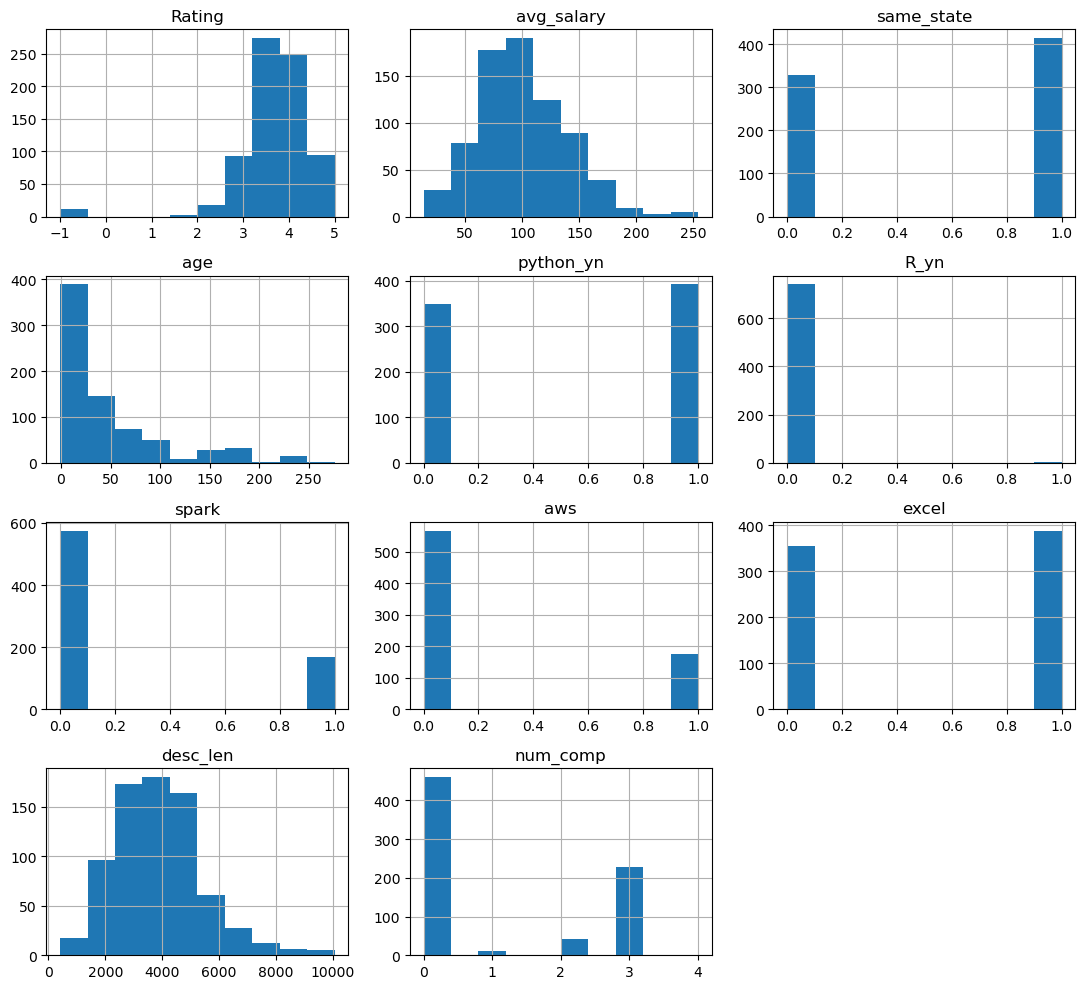

In [336]:
salary_df.hist(figsize = (11,10))
plt.tight_layout()


In [337]:
salary_df.describe()

,Rating,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [338]:
salary_df.dtypes

Job Title             object
Rating               float64
Type of ownership     object
avg_salary           float64
job_state             object
same_state             int64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
desc_len               int64
num_comp               int64
dtype: object

In [339]:
salary_df.replace(-1,np.nan,inplace=True)
salary_df.isnull().sum()

Job Title             0
Rating               11
Type of ownership     0
avg_salary            0
job_state             0
same_state            0
age                  50
python_yn             0
R_yn                  0
spark                 0
aws                   0
excel                 0
desc_len              0
num_comp              0
dtype: int64

In [340]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['age', 'avg_salary', 'desc_len', 'num_comp', 'Rating']
salary_df[numerical_cols] = scaler.fit_transform(salary_df[numerical_cols])


In [341]:
impute = SimpleImputer(strategy="median")
salary_df["Rating"] = impute.fit_transform(salary_df["Rating"].values.reshape(-1,1))
salary_df["age"] = impute.fit_transform(salary_df["age"].values.reshape(-1,1))


In [342]:
salary_df.replace(-1,np.nan,inplace=True)
salary_df.isnull().sum()

Job Title            0
Rating               0
Type of ownership    0
avg_salary           0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
desc_len             0
num_comp             0
dtype: int64

<AxesSubplot:>

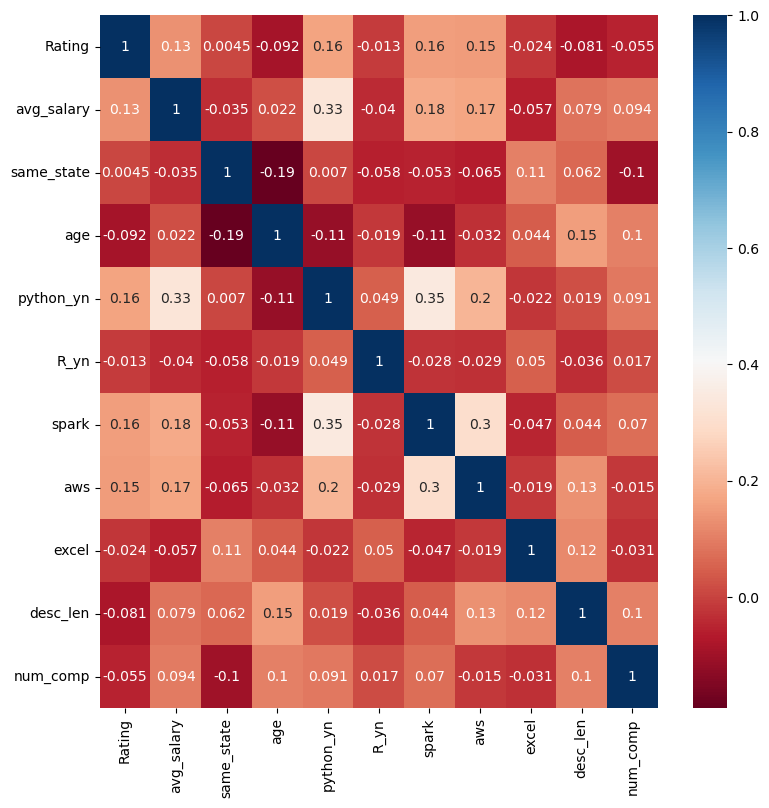

In [343]:

plt.figure(figsize = (9,9))
sns.heatmap(salary_df.corr(), annot = True, cmap='RdBu')
#view the correlation between variables to avoid collinearity 

In [344]:
salary_df.describe()
#there are -1 minumums for numerical values, impute median for any missing

,Rating,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,7.420000e+02,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,7.420000e+02,7.420000e+02
mean,0.000302,9.991259e-17,0.557951,-0.027465,0.528302,0.002695,0.225067,0.237197,0.522911,-5.554856e-17,-5.925179e-17
std,0.993233,1.000675e+00,0.496965,0.971765,0.499535,0.051882,0.417908,0.425651,0.499812,1.000675e+00,1.000675e+00
min,-3.137698,-2.243795e+00,0.000000,-0.907118,0.000000,0.000000,0.000000,0.000000,0.000000,-2.277286e+00,-7.618764e-01
25%,-0.681399,-6.985882e-01,0.000000,-0.685104,0.000000,0.000000,0.000000,0.000000,0.000000,-7.027732e-01,-7.618764e-01
50%,0.020401,-8.050555e-02,1.000000,-0.407587,1.000000,0.000000,0.000000,0.000000,1.000000,-9.112038e-02,-7.618764e-01
75%,0.546751,5.633306e-01,1.000000,0.165949,1.000000,0.000000,0.000000,0.000000,1.000000,5.724901e-01,1.406841e+00
max,2.301251,3.949909e+00,1.000000,4.180701,1.000000,1.000000,1.000000,1.000000,1.000000,4.065488e+00,2.129747e+00


In [345]:
salary_df.dtypes

Job Title             object
Rating               float64
Type of ownership     object
avg_salary           float64
job_state             object
same_state             int64
age                  float64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
desc_len             float64
num_comp             float64
dtype: object

# DTree and Logistic Regression

In [346]:
salary_df['Type of ownership'].unique()

array(['Company - Private', 'Other Organization', 'Government',
       'Company - Public', 'Hospital', 'Subsidiary or Business Segment',
       'Nonprofit Organization', 'Unknown', 'College / University',
       'School / School District', '-1'], dtype=object)

In [359]:
salary_df2 = pd.get_dummies(salary_df[['Type of ownership', 'job_state']])
salary_df2 = salary_df2.drop(columns = ['Type of ownership_-1', 'Type of ownership_Unknown'])

In [361]:
salary_con = pd.concat([salary_df, salary_df2], axis=1)
salary_con = salary_con.drop(columns = ['Type of ownership', 'job_state'])
salary_con

,Job Title,Rating,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,...,job_state_OR,job_state_PA,job_state_RI,job_state_SC,job_state_TN,job_state_TX,job_state_UT,job_state_VA,job_state_WA,job_state_WI
0,Data Scientist,3.8,72.0,0,47,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Healthcare Data Scientist,3.4,87.5,0,36,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Data Scientist,4.8,85.0,1,10,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Data Scientist,3.8,76.5,1,55,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Data Scientist,2.9,114.5,1,22,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",3.9,84.5,0,190,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
738,Senior Data Engineer,4.4,102.5,0,14,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
739,"Project Scientist - Auton Lab, Robotics Institute",2.6,73.5,1,36,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
740,Data Science Manager,3.2,127.5,0,-1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [476]:
salary_con['avg_salary'].mean()

100.62601078167116

In [478]:

X= salary_con.drop(columns = ['Job Title', 'avg_salary'])
y = (salary_con['avg_salary'] >= 100.626).astype(int)



In [479]:
X.shape, y.shape

((742, 56), (742,))

In [480]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [482]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [487]:
print('Accuracy Score Dtree:', accuracy_score(y_test, y_pred))

Accuracy Score Dtree: 0.8161434977578476


In [508]:
feature_importances = model.feature_importances_

feature_importance_dict = dict(zip(X_train.columns, feature_importances))

sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

top_predictors = 5  
for feature, importance in sorted_feature_importances[:top_predictors]:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: desc_len, Importance: 0.23268963853397304
Feature: Rating, Importance: 0.15621239288357033
Feature: age, Importance: 0.10407363527322824
Feature: job_state_CA, Importance: 0.0660947714892954
Feature: python_yn, Importance: 0.04261062444203042


In [484]:
model_lg = LogisticRegression(random_state=42)
model_lg.fit(X_train, y_train)
y_pred_log = model_lg.predict(X_test)

In [488]:
print('Accuracy Score Logistic Reg:', accuracy_score(y_test, y_pred_log))

Accuracy Score Logistic Reg: 0.695067264573991


In [489]:
data = {'Actual': y_test, 'Predicted': y_pred, 'Index': y_test.index}

df = pd.DataFrame(data)
df

,Actual,Predicted,Index
120,0,1,120
196,0,0,196
336,1,1,336
582,1,1,582
395,1,1,395
...,...,...,...
362,0,0,362
399,1,0,399
326,1,1,326
449,1,1,449


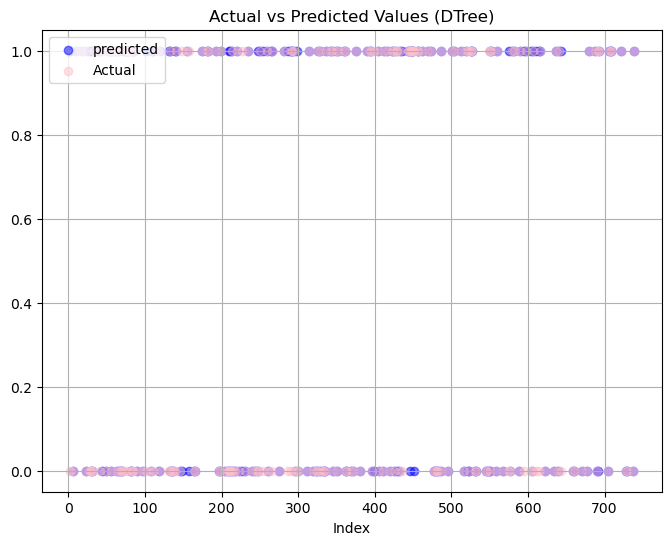

In [501]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Index'], df['Predicted'], color='blue', label = "predicted", alpha =.5)  # predicted
plt.scatter(df['Index'], df['Actual'], color = 'pink', label = 'Actual', alpha = .5) #actual
plt.legend(loc = 'upper left')

plt.xlabel('Index')
plt.title('Actual vs Predicted Values (DTree)')
plt.grid(True)
plt.show()


In [497]:
data2 = {'Actual': y_test, 'Predicted': y_pred_log, 'Index': y_test.index}


df2 = pd.DataFrame(data2)
df2

,Actual,Predicted,Index
120,0,0,120
196,0,0,196
336,1,0,336
582,1,0,582
395,1,1,395
...,...,...,...
362,0,0,362
399,1,1,399
326,1,1,326
449,1,1,449


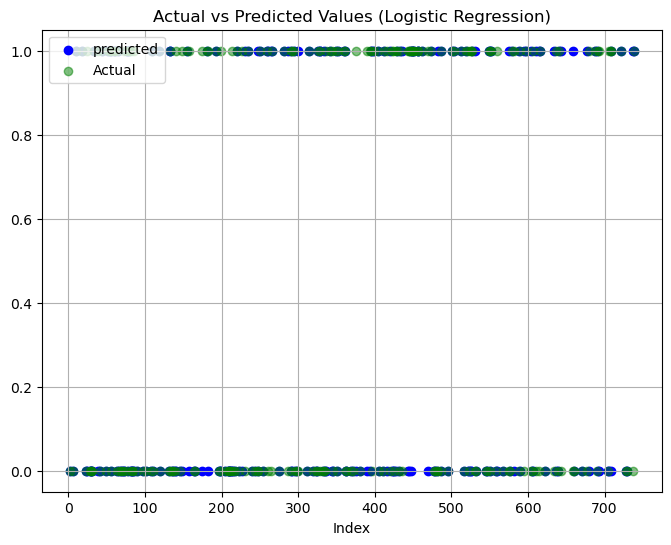

In [499]:
plt.figure(figsize=(8, 6))
plt.scatter(df2['Index'], df2['Predicted'], color='blue', label = "predicted")  # predicted
plt.scatter(df2['Index'], df2['Actual'], color = 'green', label = 'Actual', alpha = .5) #actual
plt.legend(loc = 'upper left')

plt.xlabel('Index')
plt.title('Actual vs Predicted Values (Logistic Regression)')
plt.grid(True)
plt.show()


# Kmeans clustering with the features with highest importance

The lowest SSE value found: 1646680.138
The number of iterations required to converge: 7


Text(0, 0.5, 'Age of the Company')

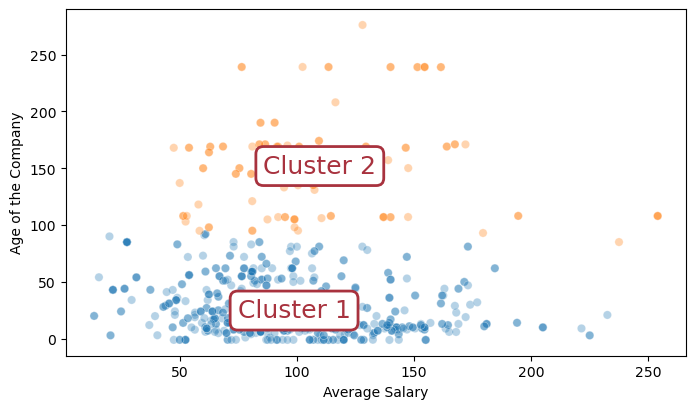

In [473]:
from sklearn.cluster import KMeans

features = ['avg_salary', 'age']
n_clusters = 2
kmeans = KMeans(init='random', n_clusters=n_clusters,
                n_init=10, max_iter=300)
kmeans.fit(salary_df[features])
print('The lowest SSE value found: %.3f'%kmeans.inertia_)
print('The number of iterations required to converge: %d'%kmeans.n_iter_)

fig, ax = plt.subplots(figsize=(8, 4.5))

ax = sns.scatterplot(ax=ax, x=salary_df[features[0]]+np.random.rand(len(salary_df))*0.1, 
                     y=salary_df[features[1]]+np.random.rand(len(salary_df))*0.2,
                     hue=kmeans.labels_, 
                     palette=sns.color_palette('tab10', n_colors=n_clusters),
                     legend=None, alpha = 0.33)

for n, [dur, qual] in enumerate(kmeans.cluster_centers_):
    ax.scatter(dur, qual, s=100, c='#a8323e')
    ax.annotate('Cluster %d'%(n+1), (dur, qual), fontsize=18,
                color='#a8323e', xytext=(dur, qual-1.5),
                bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='#a8323e', lw=2),
                ha='center', va='center');
ax.set_xlabel('Average Salary') 
ax.set_ylabel('Age of the Company')

The lowest SSE value found: 334113894.764
The number of iterations required to converge: 15


Text(0, 0.5, 'Length of Job Description')

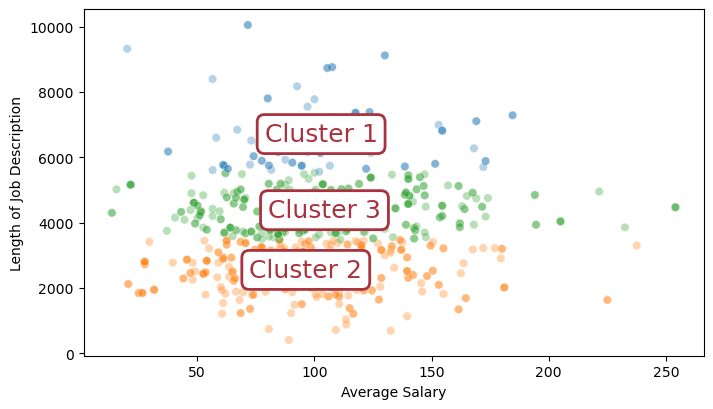

In [474]:

features = ['avg_salary', 'desc_len']
n_clusters = 3
kmeans = KMeans(init='random', n_clusters=n_clusters,
                n_init=10, max_iter=300)
kmeans.fit(salary_df[features])
print('The lowest SSE value found: %.3f'%kmeans.inertia_)
print('The number of iterations required to converge: %d'%kmeans.n_iter_)

fig, ax = plt.subplots(figsize=(8, 4.5))

ax = sns.scatterplot(ax=ax, x=salary_df[features[0]]+np.random.rand(len(salary_df))*0.1, 
                     y=salary_df[features[1]]+np.random.rand(len(salary_df))*0.2,
                     hue=kmeans.labels_, 
                     palette=sns.color_palette('tab10', n_colors=n_clusters),
                     legend=None, alpha = 0.33)

for n, [dur, qual] in enumerate(kmeans.cluster_centers_):
    ax.scatter(dur, qual, s=100, c='#a8323e')
    ax.annotate('Cluster %d'%(n+1), (dur, qual), fontsize=18,
                color='#a8323e', xytext=(dur, qual-1.5),
                bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='#a8323e', lw=2),
                ha='center', va='center');
ax.set_xlabel('Average Salary') 
ax.set_ylabel('Length of Job Description')

The lowest SSE value found: 224169.028
The number of iterations required to converge: 18


Text(0, 0.5, 'Rating')

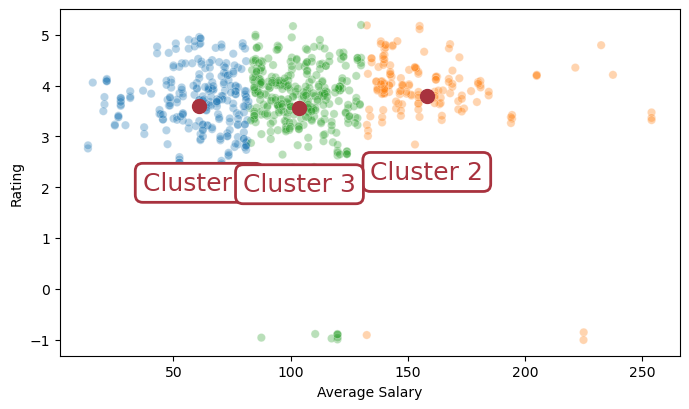

In [509]:
features = ['avg_salary', 'Rating']
n_clusters = 3
kmeans = KMeans(init='random', n_clusters=n_clusters,
                n_init=10, max_iter=300)
kmeans.fit(salary_df[features])
print('The lowest SSE value found: %.3f'%kmeans.inertia_)
print('The number of iterations required to converge: %d'%kmeans.n_iter_)

fig, ax = plt.subplots(figsize=(8, 4.5))

ax = sns.scatterplot(ax=ax, x=salary_df[features[0]]+np.random.rand(len(salary_df))*0.1, 
                     y=salary_df[features[1]]+np.random.rand(len(salary_df))*0.2,
                     hue=kmeans.labels_, 
                     palette=sns.color_palette('tab10', n_colors=n_clusters),
                     legend=None, alpha = 0.33)

for n, [dur, qual] in enumerate(kmeans.cluster_centers_):
    ax.scatter(dur, qual, s=100, c='#a8323e')
    ax.annotate('Cluster %d'%(n+1), (dur, qual), fontsize=18,
                color='#a8323e', xytext=(dur, qual-1.5),
                bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='#a8323e', lw=2),
                ha='center', va='center');
ax.set_xlabel('Average Salary') 
ax.set_ylabel('Rating')

# What type of Jobs are we examining?

In [193]:
salary['Job Title'].value_counts() > 15
salary['Job Title'].value_counts()

Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: Job Title, Length: 264, dtype: int64